## 误差的偏差-方差分解
sin曲线拟合

In [1]:
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression 

#产生训练数据,重复L=100次，每次N=25个数据点
L = 100
N = 25
x = np.zeros( N)
y = np.zeros((L, N))

#真实y
x = np.linspace(0,1,N)
y_star = np.sin(2*np.pi*x)


#观测到的y（训练数据）
for l in range(0,L): 
    y[l,:] = y_star + np.random.normal(loc=0,scale=0.3,size=N)

#测试集
x_test = np.linspace(0,1,N)
y_test = np.sin(2*np.pi*x_test) + np.random.normal(loc=0,scale=0.3,size=N)

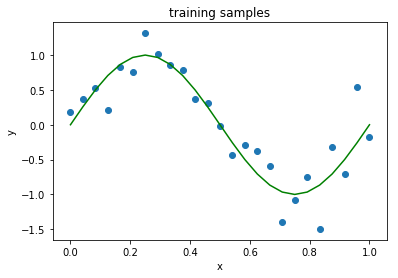

In [3]:
#显示第一次的训练数据
x_train = x
y_train = y[0] 

plt.title("training samples")
plt.scatter(x_train,y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_star, 'g', ls = '-') 
plt.show()

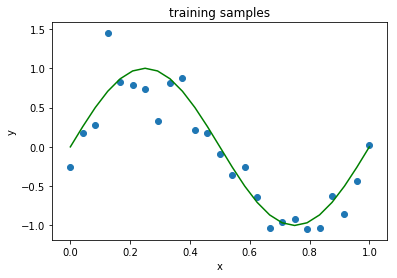

In [4]:
#显示第二次的训练数据
x_train = x
y_train = y[1] 

plt.title("training samples")
plt.scatter(x_train,y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_star, 'g', ls = '-') 
plt.show()

In [5]:
#10阶多项式，岭回归
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Ridge

alphas = np.logspace(-6, 1, num=40)
n_alphas = len(alphas)

#10阶多项式
ploy = PolynomialFeatures(degree=N)
X_train = ploy.fit_transform(x.reshape(-1,1))
X_test = ploy.transform(x_test.reshape(-1,1))

y_pred = np.zeros((L, N))

bias2s =  np.zeros((n_alphas))
variances =  np.zeros((n_alphas))
errors =  np.zeros((n_alphas))

#对不同复杂度的模型
for j in range(0, n_alphas):
    alpha =  alphas[j]
    
    #重复L次采样训练数据，训练模型，测试
    for l in range(0,L): 
        y_train = y[l]

        #模型训练
        ridge = Ridge(alpha)
        ridge.fit(X_train, y_train)

    
        #对测试集进行预测
        y_pred[l] = ridge.predict(X_test)

     
    #L次模型预测的bias，variance，and errors
    mean_y_pred = np.mean(y_pred, axis=0)
    bias = mean_y_pred - y_star
    bias = bias * bias
    bias2s[j] = np.mean(bias)
    
    var = y_pred - mean_y_pred
    var = var * var
    variances[j] = np.mean(var)
    
    res = y_pred - y_test
    res = res * res
    errors[j] = np.mean(res)    

In [6]:
best_index = np.argmin(errors)
print("best inex is %s" %best_index)
best_alpha = alphas[best_index]

best inex is 15


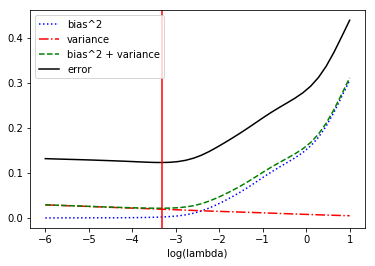

In [10]:
sum_bias2_var = bias2s + variances

#plt.title("error, bias^2, variance")
plt.plot(np.log10(alphas), bias2s, 'b', label = 'bias^2', ls = ':') 
plt.plot(np.log10(alphas), variances, 'r', label = 'variance', ls = '-.') 
plt.plot(np.log10(alphas), sum_bias2_var, 'g', label = 'bias^2 + variance', ls = '--') 

plt.plot(np.log10(alphas), errors, 'k', label = 'error') 

plt.xlabel('log(lambda)')

plt.legend()

best_alpha = alphas[np.argmin(errors)]
plt.axvline(np.log10(best_alpha), color='r')
plt.show()

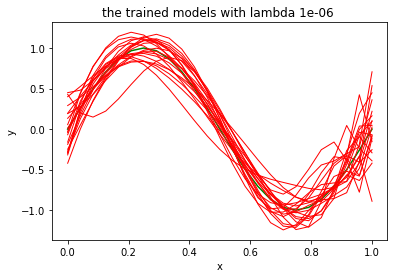

In [11]:
#显示前20个模型
alpha =  alphas[0]
plt.title("the trained models with lambda %s "%(alpha) )
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y_star, 'g') 
    
#重复L次采样训练数据，训练模型，测试
for l in range(0,20): 
    y_train = y[l]

    #模型训练
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)

    
    #对测试集进行预测
    y_pred[l] = ridge.predict(X_test)
    plt.plot(x, y_pred[l], 'r', linewidth=1)

plt.show()

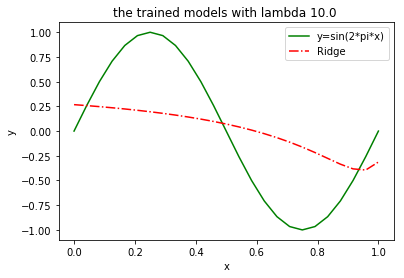

In [16]:
plt.title("the trained models with lambda %s "%(alpha) )
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y_star, 'g', ls = '-', label = 'y=sin(2*pi*x)') 

mean_y_pred = np.mean(y_pred, axis=0)
#plt.plot(x, y_pred[1], 'c') 

plt.plot(x, mean_y_pred, 'r', ls = '-.', label = 'Ridge') 

plt.legend()
plt.show()

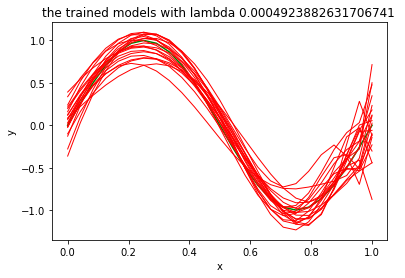

In [12]:
#显示前20个模型
alpha =  best_alpha   
plt.title("the trained models with lambda %s "%(alpha) )
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y_star, 'g') 
    
#重复L次采样训练数据，训练模型，测试
for l in range(0,20): 
    y_train = y[l]

    #模型训练
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)

    
    #对测试集进行预测
    y_pred[l] = ridge.predict(X_test)
    plt.plot(x, y_pred[l], 'r', linewidth=1)

plt.show()

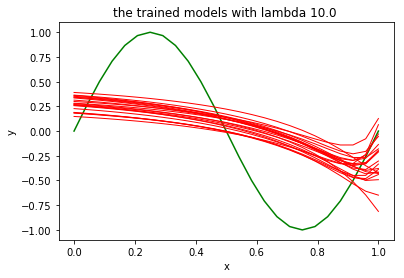

In [13]:
#显示前20个模型
alpha =  alphas[39]
plt.title("the trained models with lambda %s "%(alpha) )
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y_star, 'g') 
    
#重复L次采样训练数据，训练模型，测试
for l in range(0,20): 
    y_train = y[l]

    #模型训练
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)

    
    #对测试集进行预测
    y_pred[l] = ridge.predict(X_test)
    plt.plot(x, y_pred[l], 'r', linewidth=1)

plt.show()